Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [3]:
#Loading the csv file into a Pandas dataframe and then showing the first five rows
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
#Finding the number of rows and columns of the dataset
car_data.shape

(301, 9)

In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


We can see there are no null values. We can check this just to be sure.

In [15]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [19]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


We need to change the categorical variables to numerical.

In [20]:
# Encoding the columns with categorical data
car_data['Fuel_Type'] = car_data['Fuel_Type'].map({'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2})
car_data['Seller_Type'] = car_data['Seller_Type'].map({'Dealer' : 0, 'Individual' : 1})
car_data['Transmission'] = car_data['Transmission'].map({'Manual' : 0, 'Automatic' : 1})

In [22]:
# Observing our changes
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training and testing data

In [23]:
X = car_data.drop(columns = ['Car_Name', 'Selling_Price'])
Y = car_data['Selling_Price']

In [25]:
#Splitting using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1)

Model Training

1. Linear Regression

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [43]:
training_data_prediction = lin_reg.predict(X_train)

In [44]:
# R^2 Error Evaluation
print("R^2 Error: ", metrics.r2_score(Y_train, training_data_prediction))

R^2 Error:  0.8797992406297913


Visualize the actual prices with the predicted prices

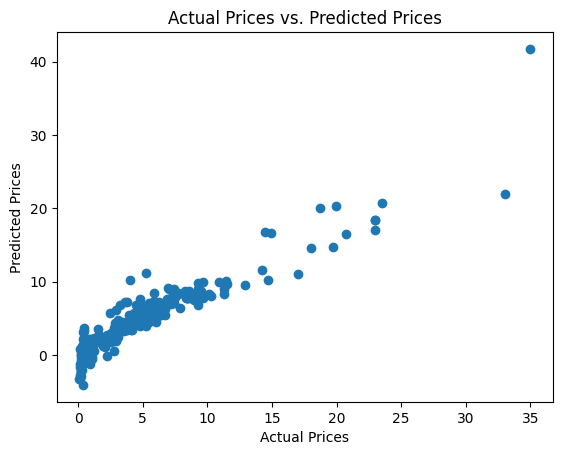

In [45]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [46]:
# Predicting the test data
test_data_prediction = lin_reg.predict(X_test)

In [37]:
# R^2 Error Evaluation for the test data
print("R^2 Error:", metrics.r2_score(Y_test, test_data_prediction))

R^2 Error: 0.8511745945101393


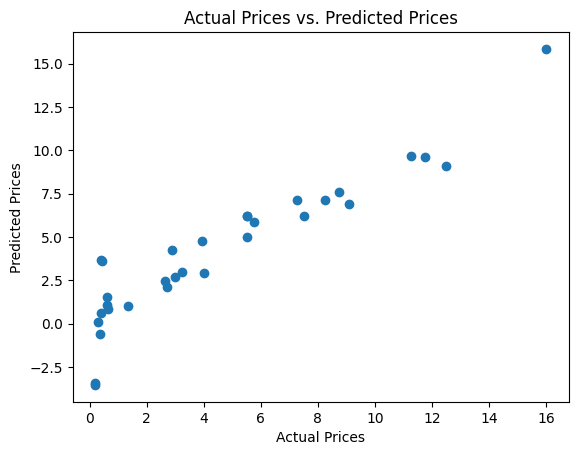

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

2. Lasso Regression

In [40]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Lasso()

In [47]:
training_data_prediction = lasso_reg.predict(X_train)

In [48]:
# R^2 Error Evaluation
print("R^2 Error: ", metrics.r2_score(Y_train, training_data_prediction))

R^2 Error:  0.843536446529996


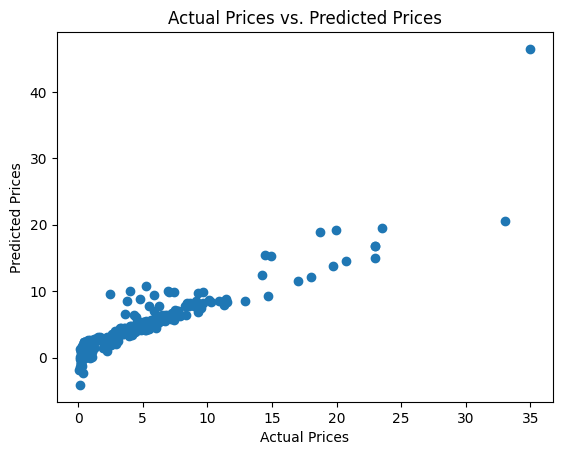

In [49]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [50]:
test_data_prediction = lasso_reg.predict(X_test)

In [51]:
# R^2 Error Evaluation for the test data
print("R^2 Error:", metrics.r2_score(Y_test, test_data_prediction))

R^2 Error: 0.8563076381377616


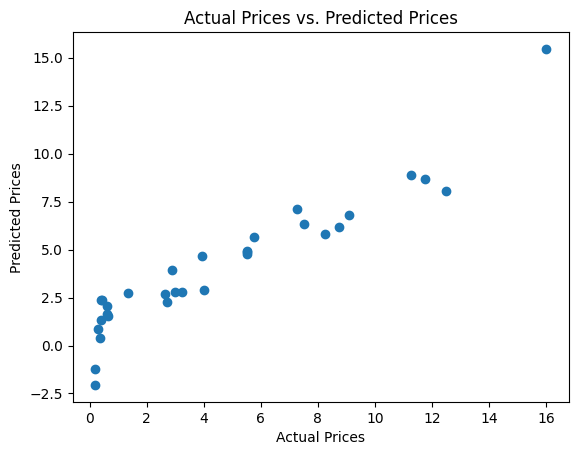

In [52]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()